In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from matplotlib.font_manager import FontProperties

In [5]:
#concat 5 features data
path = r'D:\projects\MCAD2\features'
data1 = pd.read_csv(path + '\\' + 'feature1.csv' )
data2 = pd.read_csv(path + '\\' + 'feature3.csv' )
data3 = pd.read_csv(path + '\\' + 'feature4.csv' )
data4 = pd.read_csv(path + '\\' + 'feature7.csv' )
data5 = pd.read_csv(path + '\\' + 'feature8.csv' )
cols = ['sensor1', 'sensor2', 'sensor5', 'sensor6', 'sensor7', 'sensor8']
data2, data3, data4, data5 = data2[cols], data3[cols], data4[cols], data5[cols]
data = pd.concat([data1, data2, data3, data4, data5], axis = 1)
# build Label cols by filename split
labellist = []
for i in data['filename']:
    labellist.append(i.split('_')[0])
df_label = pd.DataFrame(labellist, columns=['Label'])
data = pd.concat([data, df_label], axis = 1)
#delete problem data such as after moving average have a huge reaction at gas in 
problemlist = []
for i,v in enumerate(data['filename']):
    if v == 'DMMP_MCAD062EXXXXX_20210623_6.json':
        problemlist.append(i)
    if v == 'DMMP_MCAD067E01006_20210619_4.json':
        problemlist.append(i)
    if v == 'MS_MCAD062EXXXXX_20210623_5.json':
        problemlist.append(i)
    if v == 'MS_MCAD064E01001_20210623_3.json':
        problemlist.append(i)
    if v == 'TIC_MCAD062EXXXXX_20210623_3.json':
        problemlist.append(i)
    if v == 'TIC_MCAD068E01002_20210620_10.json':
        problemlist.append(i)
problemlist
data = data.drop(problemlist, axis = 0)
data
cols = ['sensor1', 'sensor2', 'sensor5', 'sensor6', 'sensor7', 'sensor8']
Features = data[cols]
Features = Features.values
Label = data['Label']
Label = Label.values
Label[Label == 'DMMP'] = 0
Label[Label == 'MS'] = 1
Label[Label == 'TIC'] = 2
Label = Label.astype(int)
X = Features
Y = Label
#split data to training model and caculate accuracy
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=None)
LSVM = svm.SVC(kernel='linear')
LSVM.fit(X_train, Y_train)
RSVM = svm.SVC(kernel='rbf', C=1000)
RSVM.fit(X_train, Y_train)
PSVM = svm.SVC(kernel='poly', C=1000)
PSVM.fit(X_train, Y_train)
print(LSVM.score(X_test, Y_test))
print(RSVM.score(X_test, Y_test))
print(PSVM.score(X_test, Y_test))

1.0
1.0
0.9565217391304348


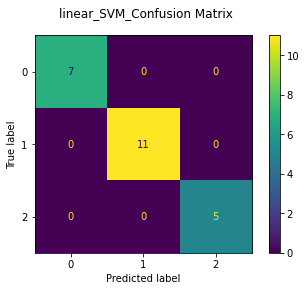

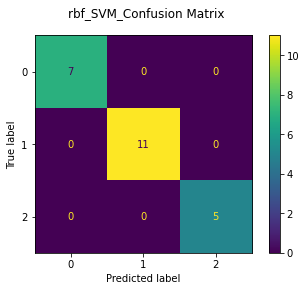

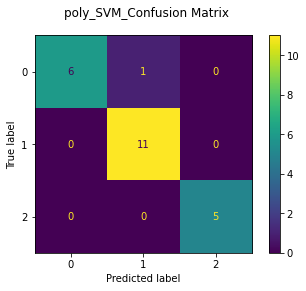

In [6]:
disp = metrics.plot_confusion_matrix(LSVM, X_test, Y_test)
disp.figure_.suptitle("linear_SVM_Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")
# plt.savefig(r'D:\projects\MCAD\Machine Learning\PLOT\rbf_SVM_Confusion Matrix.png',
#             bbox_inches='tight')
plt.show()


disp = metrics.plot_confusion_matrix(RSVM, X_test, Y_test)
disp.figure_.suptitle("rbf_SVM_Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")
# plt.savefig(r'D:\projects\MCAD\Machine Learning\PLOT\rbf_SVM_Confusion Matrix.png',
#             bbox_inches='tight')
plt.show()


disp = metrics.plot_confusion_matrix(PSVM, X_test, Y_test)
disp.figure_.suptitle("poly_SVM_Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")
# plt.savefig(r'D:\projects\MCAD\Machine Learning\PLOT\rbf_SVM_Confusion Matrix.png',
#             bbox_inches='tight')
plt.show()